In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Input File

In [3]:
Data_train=pd.read_csv('./data/train.csv')

Data_test=pd.read_csv('./data/test.csv')

Data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
Data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Baseline Model (Choose two parameters to bild the linear regression)

In [6]:
t=Data_train.corrwith(Data_train['SalePrice'])

In [7]:
t.sort_values()[-3:]

GrLivArea      0.708624
OverallQual    0.790982
SalePrice      1.000000
dtype: float64

# Using GrLivArea, OverallQual Features

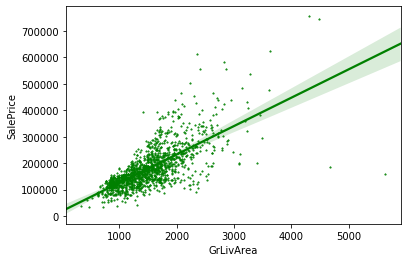

In [8]:
#GrLivArea
sns.regplot(x="GrLivArea", y="SalePrice", data=Data_train, marker='*', color='green', scatter_kws={'s':2})

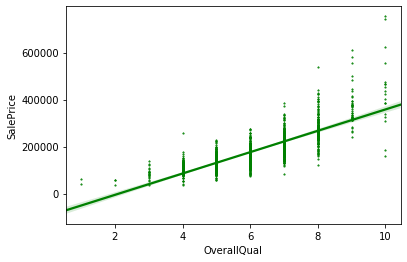

In [9]:
#OverallQual 
sns.regplot(x="OverallQual", y="SalePrice", data=Data_train, marker='*', color='green', scatter_kws={'s':2})

In [11]:
AllData=pd.concat([Data_train,Data_test])
AllData

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [12]:
Data_train_label=Data_train['SalePrice']
AllData=AllData[['OverallQual','GrLivArea']]

In [13]:
AllData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 2 columns):
OverallQual    2919 non-null int64
GrLivArea      2919 non-null int64
dtypes: int64(2)
memory usage: 68.4 KB


In [14]:
from sklearn import preprocessing
AllData.mean(axis=0)

OverallQual       6.089072
GrLivArea      1500.759849
dtype: float64

In [15]:
scaler = preprocessing.StandardScaler().fit(AllData)
t=scaler.transform(AllData)

In [16]:
AllData=pd.DataFrame(t)

In [17]:
AllData.columns=['OverallQual', 'GrLivArea']
AllData

,OverallQual,GrLivArea
0,0.646183,0.413547
1,-0.063185,-0.471891
2,0.646183,0.563755
3,0.646183,0.427382
4,1.355551,1.378042
...,...,...
2914,-1.481920,-0.807883
2915,-1.481920,-0.807883
2916,-0.772552,-0.546995
2917,-0.772552,-1.049006


In [18]:
data_train=AllData[:1460]
data_test=AllData[1460:]
X=data_train
y=Data_train_label

# 訓練Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.7141732234458849

In [20]:
price=reg.predict(data_test)

Data_res=Data_test[['Id','MSSubClass']]

Data_res['SalePrice']=price

Data_res.drop('MSSubClass',axis=1,inplace=True)

Data_res.to_csv('LinearReg.csv',index=False)

## loss score : 0.84138 (前98%)